# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [3]:
base_dados_base = pd.read_csv('base_dados_base')
base_dados_base.head(3)

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,0,0,1,1,0,0,0,0,0,58.832877,3.106849,1,0,0,0,2.0,0
1,1,1,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0
2,2,1,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0,0


In [26]:
base_dados_base.dtypes

Unnamed: 0                 int64
sexo                       int64
posse_de_veiculo           int64
posse_de_imovel            int64
qtd_filhos                 int64
tipo_renda                 int64
educacao                   int64
estado_civil               int64
tipo_residencia            int64
idade                    float64
tempo_emprego            float64
possui_celular             int64
possui_fone_comercial      int64
possui_fone                int64
possui_email               int64
qt_pessoas_residencia    float64
mau                        int64
dtype: object

In [31]:
# dividir o dataframe entre treino e validação
y = base_dados_base.mau
y

0        0
1        0
2        0
3        0
4        0
        ..
16645    1
16646    1
16647    1
16648    1
16649    1
Name: mau, Length: 16650, dtype: int64

In [12]:
X = base_dados_base.drop('mau',axis=1)
X

,Unnamed: 0,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia
0,0,0,1,1,0,0,0,0,0,58.832877,3.106849,1,0,0,0,2.0
1,1,1,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0
2,2,1,0,1,0,1,0,1,0,52.356164,8.358904,1,0,1,1,1.0
3,3,0,1,1,0,0,1,0,0,46.224658,2.106849,1,1,1,1,2.0
4,4,1,1,0,0,0,2,0,0,29.230137,3.021918,1,0,0,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16645,16645,1,0,1,0,0,0,2,0,54.109589,9.884932,1,0,0,0,2.0
16646,16646,1,0,1,0,1,0,0,0,43.389041,7.380822,1,1,1,0,2.0
16647,16647,0,1,1,0,0,0,0,0,30.005479,9.800000,1,1,0,0,2.0
16648,16648,0,1,1,0,0,0,0,0,30.005479,9.800000,1,1,0,0,2.0


In [32]:
clf = DecisionTreeClassifier(random_state=100)
clf

DecisionTreeClassifier(random_state=100)

In [35]:
clf = clf.fit(X,y)
clf

DecisionTreeClassifier(random_state=100)

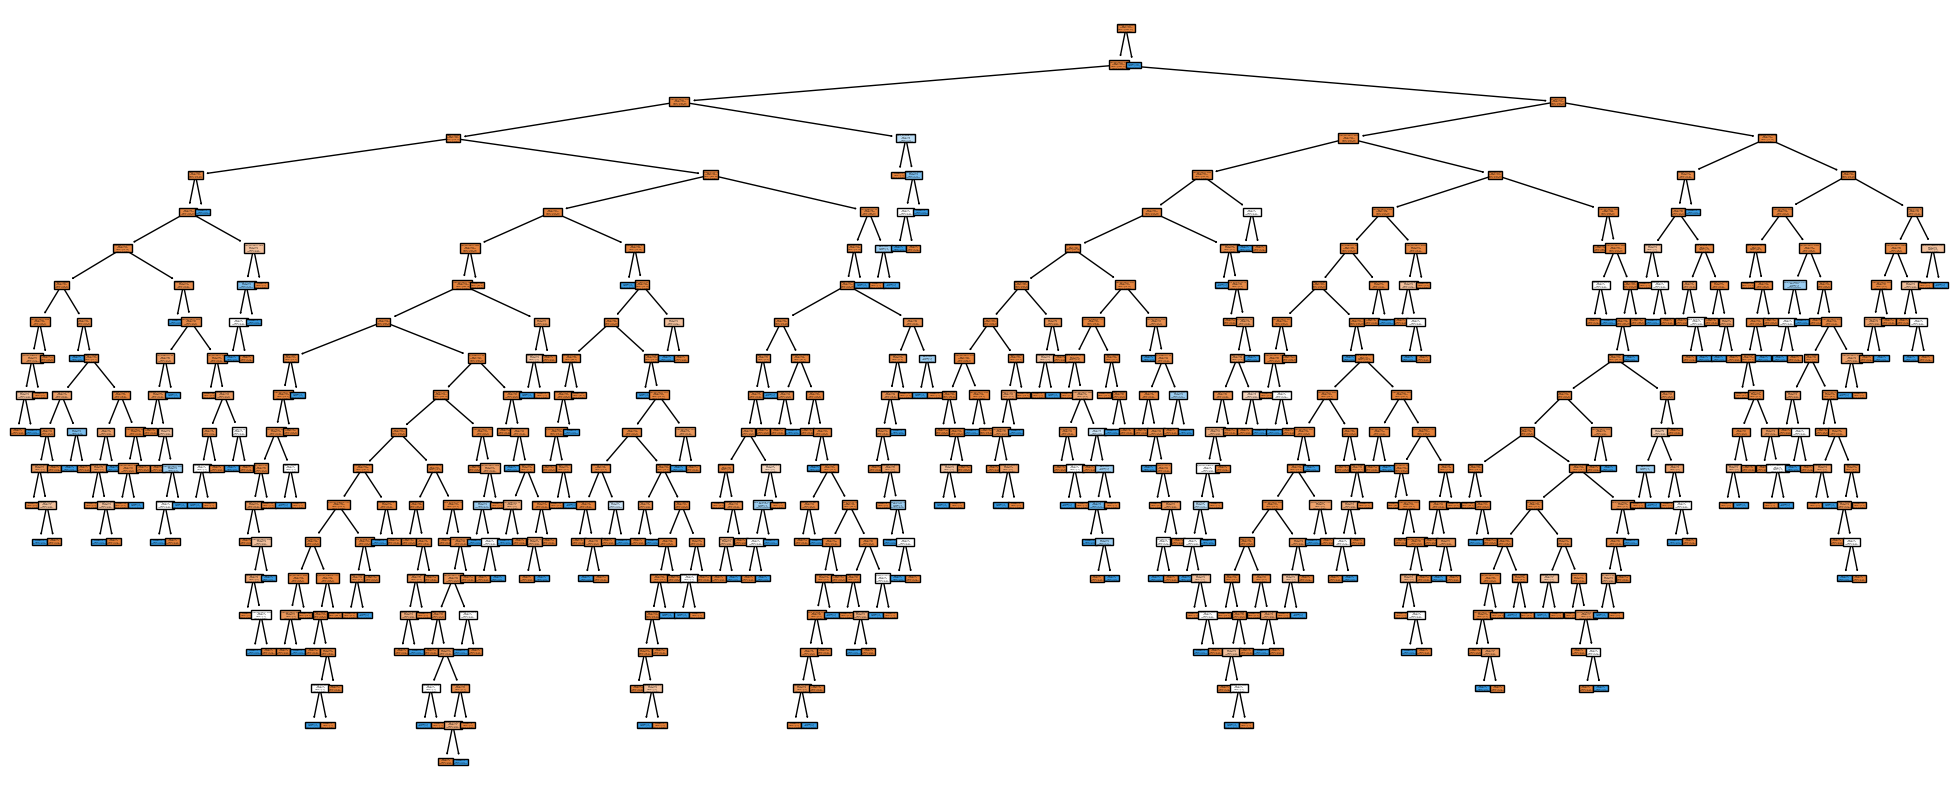

In [54]:
plt.figure(figsize=(25, 10))
plot_tree(clf,
          filled=True,
          class_names=['Aprovados', 'Reprovados'],
          feature_names=X.columns);

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

D:\Ana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


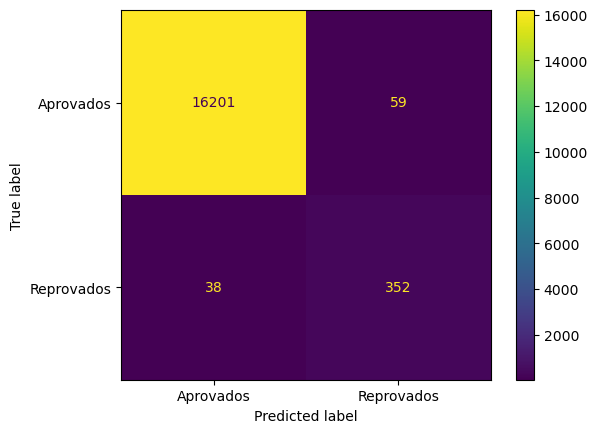

In [55]:
plot_confusion_matrix(clf, X, y, display_labels=['Aprovados', 'Reprovados']);

In [57]:
predict = clf.predict(X)


array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
accuracy_score(y, predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [58]:
clf = DecisionTreeClassifier(random_state=123)
clf = clf.fit(X_train,y_train)

In [59]:
y_chapeu_teste = clf.predict(X_test)
y_chapeu_teste

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

D:\Ana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


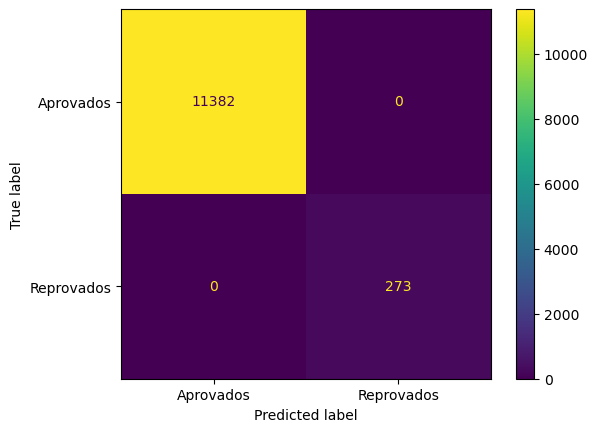

In [60]:
plot_confusion_matrix(clf, X_train,y_train, display_labels=['Aprovados', 'Reprovados']);

D:\Ana\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


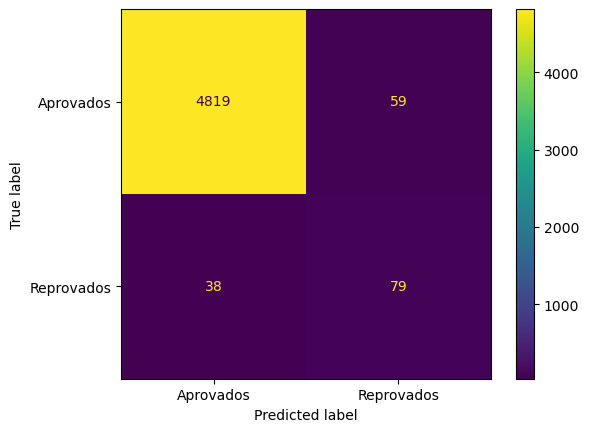

In [61]:
plot_confusion_matrix(clf, X_test, y_test, display_labels=['Aprovados', 'Reprovados']);

In [51]:
X_test.shape

(4995, 16)

In [62]:
accuracy_score(y_test, y_chapeu_teste)

0.9805805805805806